<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [7]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [8]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [9]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [10]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

In [11]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

In [12]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

In [13]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


In [14]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


### NORMALIZACION

In [15]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   distancia_domicilio                     4410 non-null   int64  
 1   educacion                               4410 non-null   int64  
 2   nivel_de_cargo                          4410 non-null   int64  
 3   ingresos_mensuales                      4410 non-null   int64  
 4   empresas_anteriores                     4410 non-null   float64
 5   porcentaje_aumentosalario               4410 non-null   int64  
 6   nivel_de_opciones                       4410 non-null   int64  
 7   años_de_trabajo                         4410 non-null   float64
 8   años_jefe_actual                        4410 non-null   int64  
 9   satisfaccion_entorno                    4410 non-null   float64
 10  satisfaccion_laboral                    4410 non-null   floa

In [16]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo 1

In [17]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.862


In [18]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.859


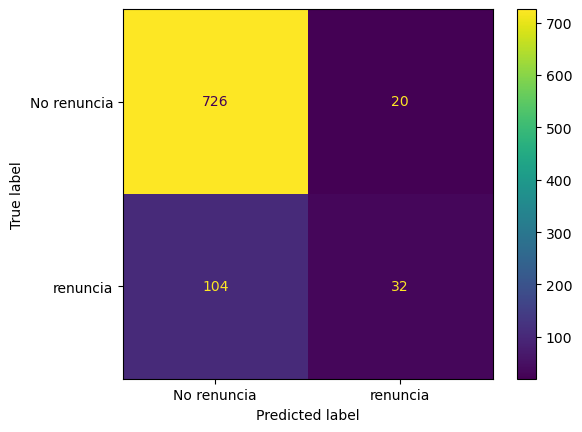

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [20]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.6153846153846154
Recall: 0.23529411764705882
Especificidad: 0.9731903485254692
F1 score: 0.3404255319148936


In [21]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.14
RMSE 0.37
MAE: 0.14
MAPE: 102122440529943.33
R2: -0.08
R2-adjusted: -0.14


# Modelo 1.1

In [22]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.749


In [23]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.740


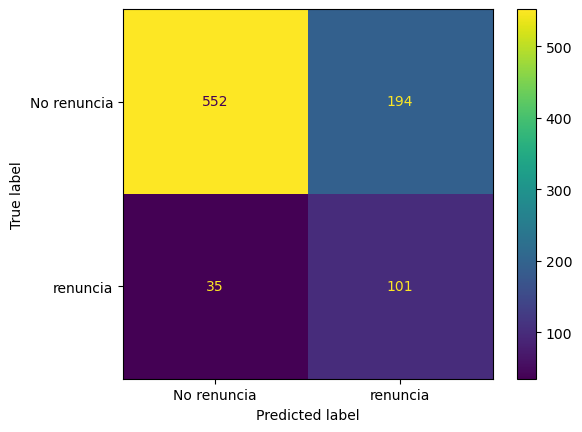

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [25]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3423728813559322
Recall: 0.7426470588235294
Especificidad: 0.739946380697051
F1 score: 0.46867749419953597


In [26]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.26
RMSE 0.51
MAE: 0.26
MAPE: 990587673140449.25
R2: -0.99
R2-adjusted: -1.10


# Penalizar clases mayoritarias y balanceo de clases

# BALANCEO DE CLASES

In [27]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2953, 1: 575})
Distribution after resampling Counter({0: 2953, 1: 2953})


# SELECCION DE VARIABLES


## Metodo integrado 

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [29]:
# metodo integrado
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

In [30]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=30) #entre mas aumente el parametro de serializacon, ams variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_base1 = X_train_std[:,X_new]
X_test_base1= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[-4.29764997e-03 -8.25238757e-03 -8.33046214e-03 -2.94954216e-03
  2.80708048e-02  3.96502675e-03 -0.00000000e+00 -5.38195563e-02
 -2.15636786e-02 -4.44293404e-02 -4.43960936e-02 -2.11082778e-02
 -8.43284469e-03  7.25613897e-02 -4.32939983e-02  1.04292381e-01
 -0.00000000e+00  4.68829312e-02 -0.00000000e+00 -1.06792863e-04
  9.70545026e-02  2.39141763e-02 -1.60196510e-04  5.89384844e-03
 -9.30455253e-03 -1.65639103e-02 -0.00000000e+00 -0.00000000e+00
  1.51036040e-02 -5.66075492e-03 -3.83098788e-02  6.30878247e-02
  2.53007131e-02  2.94184920e-02 -3.32718730e-03 -2.31069875e-02
 -0.00000000e+00  1.20565160e-01  0.00000000e+00 -0.00000000e+00
  3.00159573e-02  3.48876275e-02 -0.00000000e+00 -6.47243956e-03
 -6.22599673e-02]


,educacion,nivel_de_cargo,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,...,nombre_cargo_Manufacturing Director,nombre_cargo_Research Director,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
3256,4,2,2.0,10.0,3,2.0,4.0,3.0,3,5.9478,...,1,0,0,0,0,1,0,1,0,0
1730,3,5,0.0,8.0,5,4.0,4.0,3.0,2,6.6432,...,0,0,1,0,0,1,0,1,0,0
3076,4,3,1.0,13.0,12,2.0,1.0,1.0,2,5.5396,...,0,0,0,1,0,0,1,0,0,0
3479,2,2,1.0,1.0,0,1.0,3.0,2.0,4,7.4202,...,0,0,0,1,1,0,0,1,0,0
935,2,1,1.0,4.0,3,4.0,2.0,3.0,3,7.5559,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2,3,9.0,3.0,0,3.0,4.0,3.0,2,7.8956,...,0,0,1,0,0,1,1,0,0,0
231,5,2,4.0,21.0,0,2.0,4.0,2.0,3,8.5460,...,0,0,0,1,1,0,0,1,0,0
2513,4,1,4.0,37.0,14,2.0,2.0,2.0,3,6.4664,...,0,0,0,0,1,0,0,1,0,0
3823,3,1,1.0,6.0,1,2.0,2.0,2.0,3,6.1457,...,0,1,0,0,0,0,1,0,0,0


# Método Wrapper 

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

In [32]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (3 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 30)

# Nuevo conjunto de datos
X_train_base2 = X_train_std[:,X_new_class]
X_test_base2= X_test_std[:,X_new_class]
X_train.iloc[:,X_new]

Num Features: 30
Selected Features: [False False False False  True False False  True  True  True  True  True
 False  True  True  True False  True False False  True False  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True]
Feature Ranking: [ 9 10  8 15  1 11 14  1  1  1  1  1  6  1  1  1  5  1  2  3  1  4  1 16
  1  1 13  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1 12  1  1]


,educacion,nivel_de_cargo,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,...,nombre_cargo_Manufacturing Director,nombre_cargo_Research Director,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
3256,4,2,2.0,10.0,3,2.0,4.0,3.0,3,5.9478,...,1,0,0,0,0,1,0,1,0,0
1730,3,5,0.0,8.0,5,4.0,4.0,3.0,2,6.6432,...,0,0,1,0,0,1,0,1,0,0
3076,4,3,1.0,13.0,12,2.0,1.0,1.0,2,5.5396,...,0,0,0,1,0,0,1,0,0,0
3479,2,2,1.0,1.0,0,1.0,3.0,2.0,4,7.4202,...,0,0,0,1,1,0,0,1,0,0
935,2,1,1.0,4.0,3,4.0,2.0,3.0,3,7.5559,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2,3,9.0,3.0,0,3.0,4.0,3.0,2,7.8956,...,0,0,1,0,0,1,1,0,0,0
231,5,2,4.0,21.0,0,2.0,4.0,2.0,3,8.5460,...,0,0,0,1,1,0,0,1,0,0
2513,4,1,4.0,37.0,14,2.0,2.0,2.0,3,6.4664,...,0,0,0,0,1,0,0,1,0,0
3823,3,1,1.0,6.0,1,2.0,2.0,2.0,3,6.1457,...,0,1,0,0,0,0,1,0,0,0


# Modelo de Regresión Logística

### Modelo 1 con Lasso

In [33]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base1, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.746


In [34]:
y_pred = modelo.predict(X_test_base1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.731


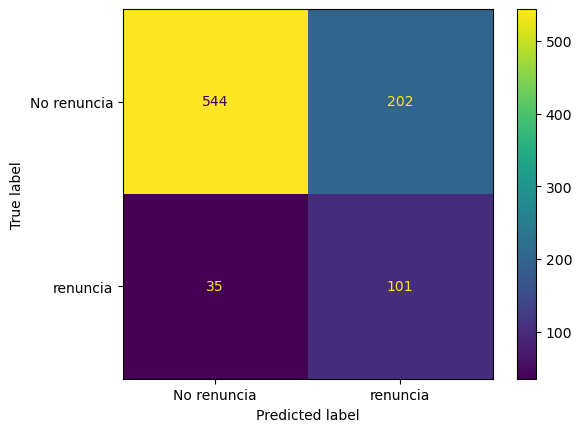

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [36]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3333333333333333
Recall: 0.7426470588235294
Especificidad: 0.7292225201072386
F1 score: 0.46013667425968113


In [37]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.27
RMSE 0.52
MAE: 0.27
MAPE: 1031436649352426.50
R2: -1.06
R2-adjusted: -1.17


### Modelo 1 con Wrapper

In [38]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.745


In [39]:
y_pred = modelo.predict(X_test_base2)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.724


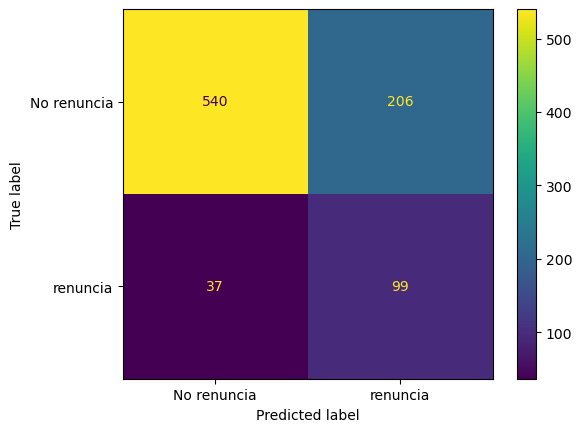

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [41]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.32459016393442625
Recall: 0.7279411764705882
Especificidad: 0.7238605898123325
F1 score: 0.4489795918367347


In [42]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.28
RMSE 0.52
MAE: 0.28
MAPE: 1051861137458415.12
R2: -1.11
R2-adjusted: -1.23


# Modelo con balanceo de clases manual

In [43]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.772


In [44]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.739


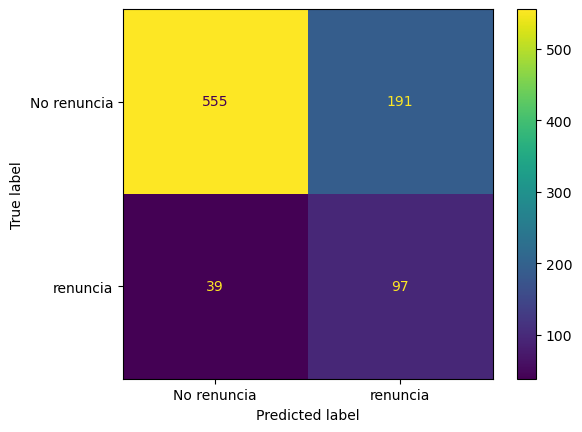

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [46]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3368055555555556
Recall: 0.7132352941176471
Especificidad: 0.7439678284182306
F1 score: 0.4575471698113208


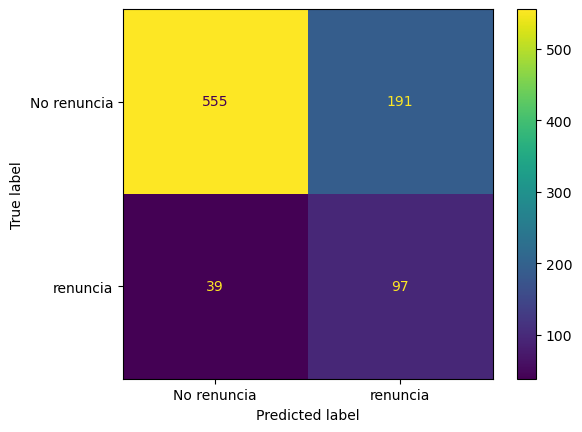

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [48]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3368055555555556
Recall: 0.7132352941176471
Especificidad: 0.7439678284182306
F1 score: 0.4575471698113208


# Modelo 2 Árboles de decisión

In [49]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [50]:
X_train_modelo3=X_train.iloc[:,X_new_class]
X_test_modelo3=X_train.iloc[:,X_new_class]

clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 6, max_leaf_nodes=30, random_state=142, class_weight="balanced")
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=30,
                       random_state=142)

In [51]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.7638888888888888
Train - classification report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      2953
           1       0.40      0.85      0.54       575

    accuracy                           0.76      3528
   macro avg       0.68      0.80      0.69      3528
weighted avg       0.87      0.76      0.79      3528

Test - Accuracy : 0.7437641723356009
Test - classification report :               precision    recall  f1-score   support

           0       0.95      0.74      0.83       746
           1       0.35      0.77      0.48       136

    accuracy                           0.74       882
   macro avg       0.65      0.76      0.66       882
weighted avg       0.85      0.74      0.78       882



In [52]:
from sklearn.metrics import recall_score
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test)))

Train - recall:
 0.8469565217391304
Test - recall : 0.7720588235294118


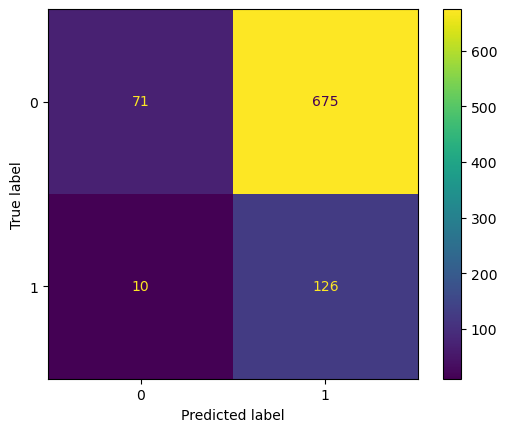

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, clf.predict(X_test_std))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

Profundidad del árbol: 6
Número de nodos terminales: 30


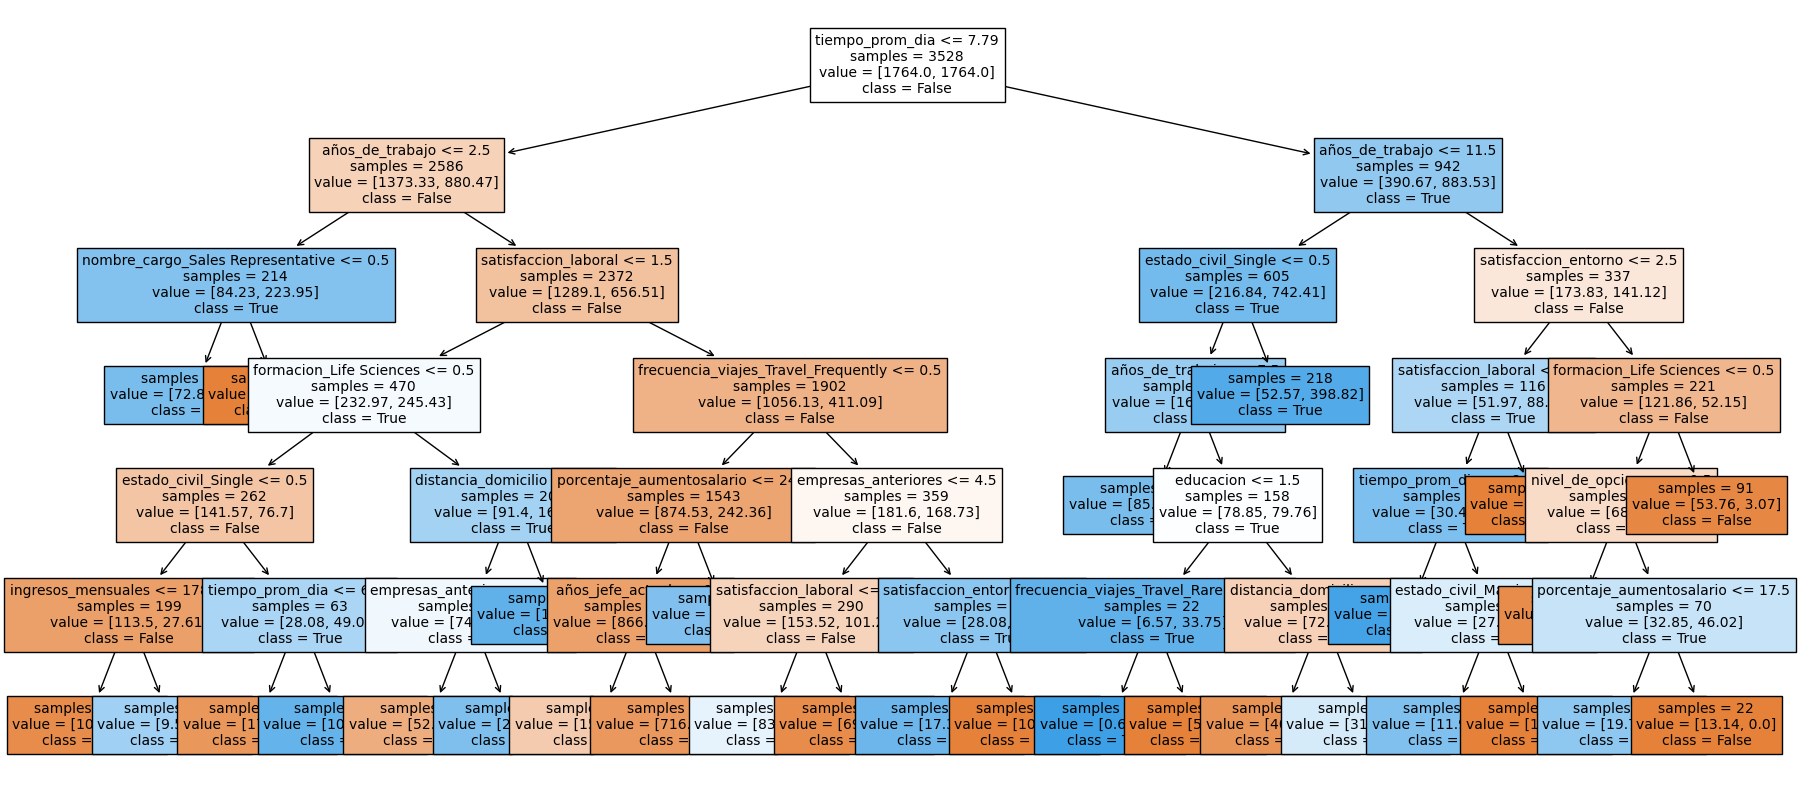

In [54]:
from sklearn.tree import plot_tree    ##########duda
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(decision_tree = clf,feature_names = X_train.columns.tolist(),class_names= ['False', 'True'],filled= True,impurity= False,fontsize= 10,precision= 2,ax= ax)

# Modelo 3 Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

In [56]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 0.812358276643991
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      2953
           1       0.46      0.77      0.57       575

    accuracy                           0.81      3528
   macro avg       0.70      0.80      0.73      3528
weighted avg       0.87      0.81      0.83      3528

Test - Accuracy : 0.7993197278911565
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.82      0.87       746
           1       0.41      0.68      0.51       136

    accuracy                           0.80       882
   macro avg       0.67      0.75      0.69       882
weighted avg       0.85      0.80      0.82       882



### Modelo 4 Gradient Boosting Classifier (con wrapper)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_base2, y_train)

GradientBoostingClassifier(max_features=4, random_state=123)

In [71]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train_base2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train_base2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_base2)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_base2)))

Train - Accuracy : 0.8999433106575964
Train - classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      2953
           1       0.92      0.42      0.58       575

    accuracy                           0.90      3528
   macro avg       0.91      0.71      0.76      3528
weighted avg       0.90      0.90      0.88      3528

Test - Accuracy : 0.8888888888888888
Test - classification report :               precision    recall  f1-score   support

           0       0.90      0.98      0.94       746
           1       0.80      0.38      0.51       136

    accuracy                           0.89       882
   macro avg       0.85      0.68      0.72       882
weighted avg       0.88      0.89      0.87       882



### Modelo 5 Support Vector Machine (con wrapper)

In [61]:
from sklearn.svm import SVC
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_base2, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [62]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_base2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_base2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_base2)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_base2)))

Train - Accuracy : 0.7437641723356009
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      2953
           1       0.37      0.77      0.50       575

    accuracy                           0.74      3528
   macro avg       0.65      0.76      0.66      3528
weighted avg       0.85      0.74      0.77      3528

Test - Accuracy : 0.7256235827664399
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.73      0.82       746
           1       0.32      0.71      0.44       136

    accuracy                           0.73       882
   macro avg       0.63      0.72      0.63       882
weighted avg       0.84      0.73      0.76       882



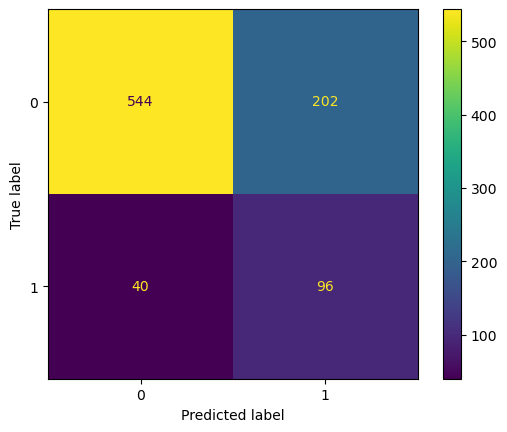

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_base2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## PARA CATEGORICAS ES MAS DESDE LO GRAFICO

## SELECCION UNIVARIANTE